# Data analysis

In [1]:
# load help packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # additional plotting functionality
import os
from IPython.display import display, Markdown
from glob import glob

In [2]:
chest14_df = pd.read_csv('/datasets/medical/chest-14/Data_Entry_2017.csv')

display(chest14_df.head(5), chest14_df.shape)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


(112120, 12)

In [3]:
img_count = len(chest14_df)
img_paths = glob('/datasets/medical/chest-14/images*/images/*.png')

assert img_count == len(img_paths)

In [4]:
#Adding fullpath to dataframe
full_img_paths = {os.path.basename(path): path for path in img_paths}

pd.set_option('display.max_colwidth', None)
chest14_df['Image Path'] = chest14_df['Image Index'].map(full_img_paths.get)
display(chest14_df[['Image Index','Image Path']].head())

pd.reset_option('display.max_colwidth')

,Image Index,Image Path
0,00000001_000.png,/datasets/medical/chest-14/images_001/images/00000001_000.png
1,00000001_001.png,/datasets/medical/chest-14/images_001/images/00000001_001.png
2,00000001_002.png,/datasets/medical/chest-14/images_001/images/00000001_002.png
3,00000002_000.png,/datasets/medical/chest-14/images_001/images/00000002_000.png
4,00000003_000.png,/datasets/medical/chest-14/images_001/images/00000003_000.png


In [5]:
# Q: how many unique labels are there? A: many (836) because of co-occurence
# Note: co-occurence will turn out to be a real pain to deal with later, but there are several techniques that help us work with it successfully
label_count = chest14_df['Finding Labels'].nunique()

# let's look at the label distribution to better plan our next step
label_counts = chest14_df['Finding Labels'].value_counts().to_frame() # get frequency counts per label

display(Markdown(f'Unique labels detected: **{label_count}**'), label_counts) # view tabular results

Unique labels detected: **836**

,Finding Labels
No Finding,60361
Infiltration,9547
Atelectasis,4215
Effusion,3955
Nodule,2705
...,...
Emphysema|Hernia|Pleural_Thickening,1
Atelectasis|Cardiomegaly|Consolidation|Edema,1
Atelectasis|Cardiomegaly|Effusion|Fibrosis|Pleural_Thickening,1
Atelectasis|Cardiomegaly|Effusion|Mass|Pleural_Thickening,1


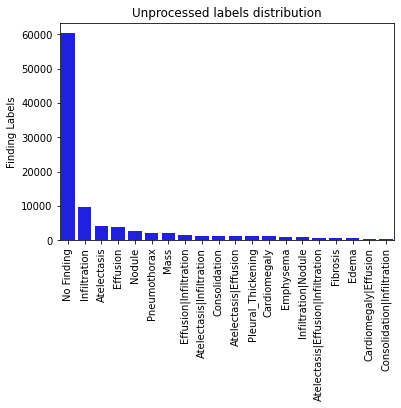

In [6]:
sns.barplot(x = label_counts.index[:20], y="Finding Labels", data=label_counts[:20], color = "blue"), plt.xticks(rotation = 90) # visualize results graphically
plt.title("Unprocessed labels distribution")
sns.despine(top=False, right=False)

In [7]:
chest14_df['Finding Labels'] = chest14_df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))

In [8]:
parsed_labels = label_counts.index.map(lambda index: index.split('|'))
clear_labels = np.unique(np.concatenate(parsed_labels))
clear_labels = np.delete(clear_labels, np.argwhere(clear_labels == 'No Finding'))
clear_labels

array(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration',
       'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
       'Pneumothorax'], dtype='<U18')

In [9]:
# One Hot Encoding of Finding Labels to dummy_labels
for label in clear_labels:
    chest14_df[label] = chest14_df['Finding Labels'].map(lambda labels: 1.0 if label in labels else 0)
chest14_df.iloc[:,13:].head(10) # check the data, looking good!

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# now, let's see how many cases present for each of of our 14 clean classes (which excl. 'No Finding')
clear_labels_count = chest14_df[clear_labels].sum().sort_values(ascending= False) # get sorted value_count for clean labels

# plot cases using seaborn barchart
clear_labels_df = clear_labels_count.to_frame()
clear_labels_df.columns = ['Label count']
display(clear_labels_df, clear_labels.shape)

,Label count
Infiltration,19894.0
Effusion,13317.0
Atelectasis,11559.0
Nodule,6331.0
Mass,5782.0
Pneumothorax,5302.0
Consolidation,4667.0
Pleural_Thickening,3385.0
Cardiomegaly,2776.0
Emphysema,2516.0


(14,)

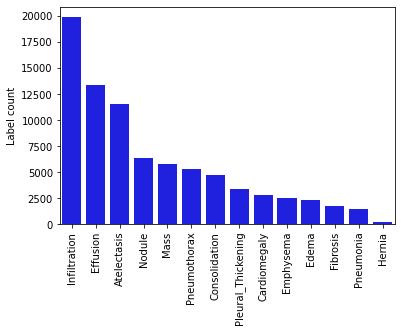

In [11]:
sns.barplot(x = clear_labels_df.index, y='Label count', data=clear_labels_df, color = "blue"), plt.xticks(rotation = 90) # visualize results graphically
sns.despine(top=False, right=False)

# Model creation

In [12]:
from itertools import chain
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, average_precision_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf

In [13]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
assert "GPU" in device_name

print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [14]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [15]:
DATA_DIR = '/datasets/medical/chest-14/'
image_size = 256
batch_size = 32

In [16]:
labels = [label for label in clear_labels if chest14_df[label].sum() > 1000]

In [17]:
train_df, valid_df = train_test_split(chest14_df, test_size=0.20, random_state=2018, stratify=chest14_df['Finding Labels'].map(lambda x: x[:4]))

In [18]:
train_df['labels'] = train_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)
valid_df['labels'] = valid_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
assert len(train_df)+len(valid_df) == len(chest14_df)
assert len(train_df) == np.round(len(chest14_df)*0.8)
assert len(valid_df) == np.round(len(chest14_df)*0.2)

In [20]:
print(train_df.shape,valid_df.shape)

(89696, 28) (22424, 28)


In [21]:
len(train_df[train_df.astype(str)['labels'] != "['']"])

41407

In [22]:
len(valid_df[valid_df.astype(str)['labels'] != "['']"])

10352

In [52]:
core_idg = ImageDataGenerator(rescale=1 / 255,
                                  samplewise_center=True,
                                  samplewise_std_normalization=True,
                                  horizontal_flip=True,
                                  vertical_flip=False,
                                  height_shift_range=0.05,
                                  width_shift_range=0.1,
                                  rotation_range=5,
                                  shear_range=0.1,
                                  fill_mode='reflect',
                                  zoom_range=0.15)

train_gen = core_idg.flow_from_dataframe(dataframe=train_df,
                                             directory=None,
                                             x_col='Image Path',
                                             y_col='labels',
                                             class_mode='categorical',
                                             batch_size=batch_size,
                                             classes=labels,
                                             target_size=(image_size, image_size))

test_X, test_Y = next(core_idg.flow_from_dataframe(dataframe=valid_df,
                                                       directory=None,
                                                       x_col='Image Path',
                                                       y_col='labels',
                                                       class_mode='categorical',
                                                       batch_size=4096,
                                                       classes=labels,
                                                       target_size=(image_size, image_size)))

Found 41318 validated image filenames belonging to 13 classes.
Found 10331 validated image filenames belonging to 13 classes.


In [24]:
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.nasnet import NASNetMobile
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

base_model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output = tf.keras.layers.Dense(len(labels), activation="sigmoid")(x)
model = tf.keras.Model(base_model.input, output)
model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
def get_callbacks(model_name):
    callbacks = []
    tensor_board = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0)
    callbacks.append(tensor_board)
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath=f'model.{model_name}.h5',
        verbose=1,
        save_best_only=True)
    early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
    callbacks.append(checkpoint)
    callbacks.append(early)
    return callbacks

In [26]:
callbacks = get_callbacks('inceptionresnetv2')
model.fit(train_gen,
              steps_per_epoch=100,
              validation_data=(test_X, test_Y),
              epochs=50,
              callbacks=callbacks)

Epoch 1/50
100/100 [==============================] - ETA: 0s - loss: 0.3408 - accuracy: 0.2463
Epoch 00001: val_loss improved from inf to 0.62173, saving model to model.inceptionresnetv2.h5
100/100 [==============================] - 74s 739ms/step - loss: 0.3408 - accuracy: 0.2463 - val_loss: 0.6217 - val_accuracy: 0.0703
Epoch 2/50
100/100 [==============================] - ETA: 0s - loss: 0.3132 - accuracy: 0.2897
Epoch 00002: val_loss did not improve from 0.62173
100/100 [==============================] - 70s 699ms/step - loss: 0.3132 - accuracy: 0.2897 - val_loss: 0.6312 - val_accuracy: 0.0679
Epoch 3/50
100/100 [==============================] - ETA: 0s - loss: 0.3081 - accuracy: 0.3047
Epoch 00003: val_loss improved from 0.62173 to 0.39659, saving model to model.inceptionresnetv2.h5
100/100 [==============================] - 72s 717ms/step - loss: 0.3081 - accuracy: 0.3047 - val_loss: 0.3966 - val_accuracy: 0.2373
Epoch 4/50
100/100 [==============================] - ETA: 0s - l

In [27]:
pred_Y = model.predict(test_X)

In [28]:
for label, p_count, t_count in zip(labels,
                                     100 * np.mean(pred_Y, 0),
                                     100 * np.mean(test_Y, 0)):
    print('%s: actual: %2.2f%%, predicted: %2.2f%%' % (label, t_count, p_count))

Atelectasis: actual: 22.07%, predicted: 27.26%
Cardiomegaly: actual: 5.54%, predicted: 6.02%
Consolidation: actual: 9.40%, predicted: 5.10%
Edema: actual: 4.54%, predicted: 1.60%
Effusion: actual: 25.76%, predicted: 47.16%
Emphysema: actual: 5.20%, predicted: 1.17%
Fibrosis: actual: 2.69%, predicted: 1.99%
Infiltration: actual: 39.16%, predicted: 31.64%
Mass: actual: 11.47%, predicted: 11.60%
Nodule: actual: 12.13%, predicted: 18.52%
Pleural_Thickening: actual: 6.30%, predicted: 8.93%
Pneumonia: actual: 3.12%, predicted: 1.95%
Pneumothorax: actual: 10.06%, predicted: 6.11%


Text(0, 0.5, 'True Positive Rate')

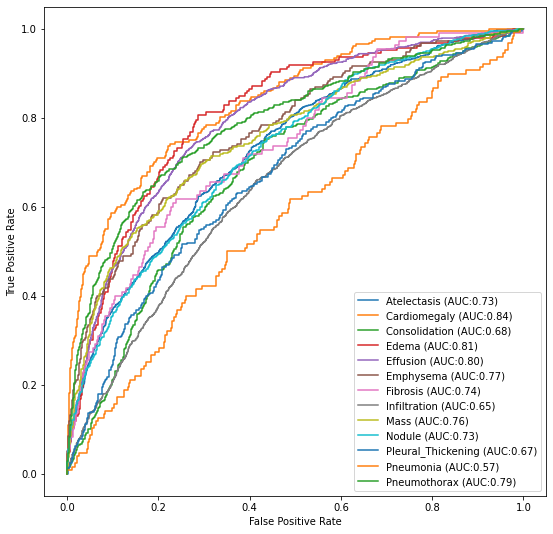

In [29]:
fig, c_ax = plt.subplots(1, 1, figsize=(9, 9))
for (idx, c_label) in enumerate(labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:, idx].astype(int), pred_Y[:, idx])
    c_ax.plot(fpr, tpr, label='%s (AUC:%0.2f)' % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
# fig.savefig('trained_net.png')

In [30]:
print('ROC auc score: {:.3f}'.format(roc_auc_score(test_Y.astype(int), pred_Y)))

ROC auc score: 0.733


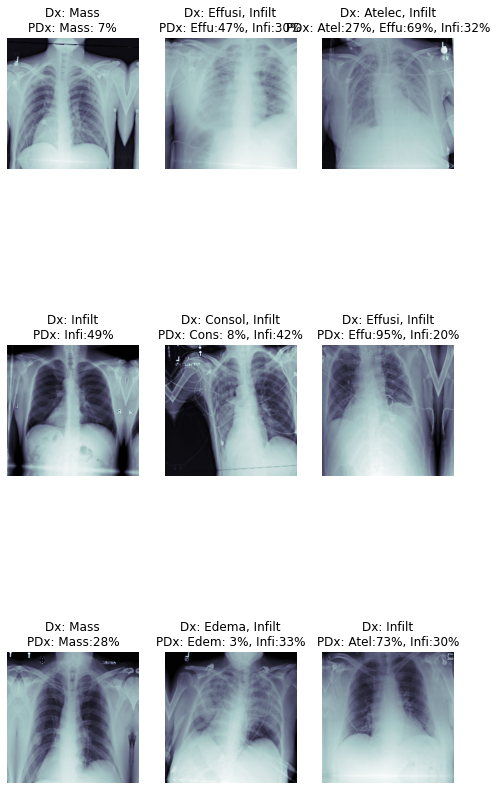

In [31]:
sickest_idx = np.argsort(np.sum(test_Y, 1)<1)
fig, m_axs = plt.subplots(3, 3, figsize = (8, 16))
for (idx, c_ax) in zip(sickest_idx, m_axs.flatten()):
    c_ax.imshow(test_X[idx, :,:,0], cmap = 'bone')
    stat_str = [n_class[:6] for n_class, n_score in zip(labels, test_Y[idx]) if n_score>0.5]
    pred_str = ['%s:%2.0f%%' % (n_class[:4], p_score*100)  for n_class, n_score, p_score in zip(labels, 
                test_Y[idx], pred_Y[idx]) if (n_score>0.5) or (p_score>0.5)]
    c_ax.set_title('Dx: '+', '.join(stat_str)+'\nPDx: '+', '.join(pred_str))
    c_ax.axis('off')
# fig.savefig('trained_img_predictions.png')

# Pneumonia

In [32]:
pneum_paths = glob('/datasets/medical/chest-xray-pneumonia/train/PNEUMONIA/*.jpeg') + \
glob('/datasets/medical/chest-xray-pneumonia/test/PNEUMONIA/*.jpeg') + \
glob('/datasets/medical/chest-xray-pneumonia/val/PNEUMONIA/*.jpeg')

In [33]:
len(pneum_paths)

4273

In [34]:
pneum_labels = [['Pneumonia'] for image in pneum_paths]

In [35]:
pneum_df = pd.DataFrame({'Image Path': pneum_paths, 'labels': pneum_labels})

In [36]:
test_X_p, test_Y_p = next(core_idg.flow_from_dataframe(dataframe=pneum_df,
                                                       directory=None,
                                                       x_col='Image Path',
                                                       y_col='labels',
                                                       class_mode='categorical',
                                                       batch_size=4096,
                                                       classes=labels,
                                                       target_size=(image_size, image_size)))

Found 4273 validated image filenames belonging to 13 classes.


In [37]:
pred_Y_p = model.predict(test_X_p)

In [131]:
pred_Y_p[:, 11]

array([0.00564889, 0.03574758, 0.01839137, ..., 0.03493556, 0.01331563,
       0.00546857], dtype=float32)

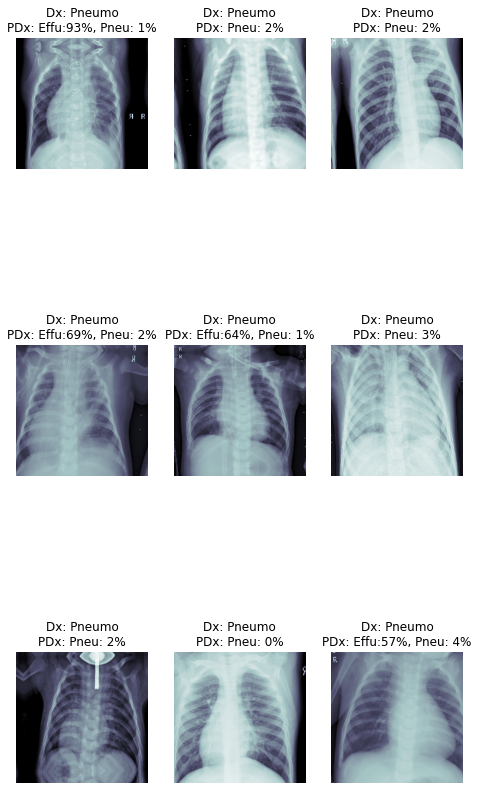

In [38]:
sickest_idx_p = np.argsort(np.sum(test_Y_p, 1)<1)
fig, m_axs = plt.subplots(3, 3, figsize = (8, 16))
for (idx, c_ax) in zip(sickest_idx_p, m_axs.flatten()):
    c_ax.imshow(test_X_p[idx, :,:,0], cmap = 'bone')
    stat_str = [n_class[:6] for n_class, n_score in zip(labels, test_Y_p[idx]) if n_score>0.5]
    pred_str = ['%s:%2.0f%%' % (n_class[:4], p_score*100)  for n_class, n_score, p_score in zip(labels, 
                test_Y_p[idx], pred_Y_p[idx]) if (n_score>0.5) or (p_score>0.5)]
    c_ax.set_title('Dx: '+', '.join(stat_str)+'\nPDx: '+', '.join(pred_str))
    c_ax.axis('off')
# fig.savefig('trained_img_predictions.png')

# Histogram matching

In [110]:
class MatchHistograms:
    
    def __init__(self, tmpl_values=np.arange(256), tmpl_counts=np.random.randint(low=1, high = 1000, size=256), *, multichannel=False):
        self.multichannel = multichannel
        self.tmpl_values = tmpl_values
        self.tmpl_counts = tmpl_counts
        
    def my_match_cumulative_cdf(self, source):
        src_values, src_unique_indices, src_counts = np.unique(source.ravel(),
                                                       return_inverse=True,
                                                       return_counts=True)

        nearest_source = (np.cumsum(src_counts)/source.size*255).astype(np.uint8)
        nearest_target = (np.cumsum(self.tmpl_counts)/np.sum(self.tmpl_counts)*255).astype(np.uint8)

        final = np.fromiter((np.argwhere(nearest_target>=ns)[0][0] for ns in nearest_source), np.uint8)

        return final[src_unique_indices].reshape(source.shape)
    

    def __call__(self, image):

        if self.multichannel:
            matched = np.empty(image.shape, dtype=image.dtype)
            for channel in range(image.shape[-1]):
                matched_channel = self.my_match_cumulative_cdf(image[..., channel])
                matched[..., channel] = matched_channel
        else:
            matched = self.my_match_cumulative_cdf(image)

        return matched.astype(np.float64)

In [100]:
hist_img = plt.imread(train_df[['Image Path']].values[0][0], format=np.uint8)

hist_values, hist_counts = np.unique(hist_img, return_counts=True)

In [171]:
core_idg2 = ImageDataGenerator(preprocessing_function=MatchHistograms(tmpl_values=hist_values, tmpl_counts=hist_counts),
                               rescale=1 / 255,
                               samplewise_center=True,
                               samplewise_std_normalization=True,
                               horizontal_flip=True,
                               vertical_flip=False,
                               height_shift_range=0.05,
                               width_shift_range=0.1,
                               rotation_range=5,
                               shear_range=0.1,
                               fill_mode='reflect',
                               zoom_range=0.15)

test_X_p_h, test_Y_p_h = next(core_idg.flow_from_dataframe(dataframe=pneum_df,
                                                           directory=None,
                                                           x_col='Image Path',
                                                           y_col='labels',
                                                           class_mode='categorical',
                                                           batch_size=4096,
                                                           classes=labels,
                                                           target_size=(image_size, image_size)))

Found 4273 validated image filenames belonging to 13 classes.


In [172]:
pred_Y_p_h = model.predict(test_X_p_h)

In [173]:
pred_Y_p_h[:, 11]

array([0.01743753, 0.00912424, 0.03627099, ..., 0.02227678, 0.02423779,
       0.02211317], dtype=float32)

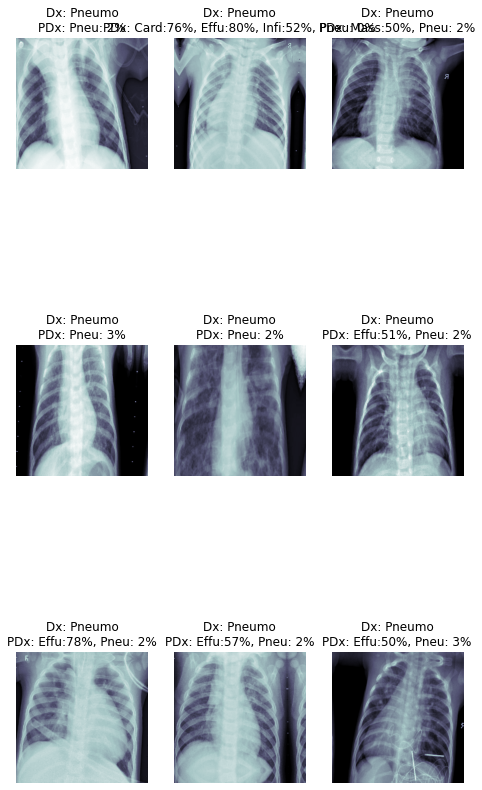

In [174]:
sickest_idx_p_h = np.argsort(np.sum(test_Y_p_h, 1)<1)
fig, m_axs = plt.subplots(3, 3, figsize = (8, 16))
for (idx, c_ax) in zip(sickest_idx_p_h, m_axs.flatten()):
    c_ax.imshow(test_X_p_h[idx, :,:,0], cmap = 'bone')
    stat_str = [n_class[:6] for n_class, n_score in zip(labels, test_Y_p_h[idx]) if n_score>0.5]
    pred_str = ['%s:%2.0f%%' % (n_class[:4], p_score*100)  for n_class, n_score, p_score in zip(labels, 
                test_Y_p_h[idx], pred_Y_p_h[idx]) if (n_score>0.5) or (p_score>0.5)]
    c_ax.set_title('Dx: '+', '.join(stat_str)+'\nPDx: '+', '.join(pred_str))
    c_ax.axis('off')
# fig.savefig('trained_img_predictions.png')

# Comparison the results

In [178]:
print(f'Pneumonia average accuracy {sum(pred_Y_p[:, 11])/len(pred_Y_p)*100:.4}%', 
      f'\nPneumonia + histogram matching average accuracy {sum(pred_Y_p_h[:, 11])/len(pred_Y_p_h)*100:.4}%')

Pneumonia average accuracy 2.147% 
Pneumonia + histogram matching average accuracy 2.151%


In [179]:
sum(pred_Y_p_h[:, 11] > pred_Y_p[:, 11]) / len(pred_Y_p)

0.502685546875